In [2]:
import pickle
with open('article.p', 'rb') as f:
    TEXT = pickle.load(f)

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')
article = nlp(TEXT)
sents = list(article.sents)

In [4]:
tokens = []
for token in article:
    tokens.append(token)

def we_care_about(t):
    #lexeme = nlp.vocab[t]
    lexeme = t
    return not lexeme.is_space and not lexeme.is_punct and not lexeme.is_stop

cool_lemmas = [t.lemma_ for t in tokens if we_care_about(t)]



In [5]:
from collections import Counter

freqs = Counter(cool_lemmas)
N = 15
interesting_words = [x for x,_ in freqs.most_common(N)]



In [6]:
word_weights = dict()
most_common_freq = freqs.most_common(1)[0][1]
weight_mult = 1 / most_common_freq
for word in interesting_words:
    word_weights[word] = freqs[word] * weight_mult

In [7]:
def score_sent(sent, weights):
    score = 0.0
    for word in sent:
        score += weights.get(word.lemma_, 0.0)
    return score / len(sent)

In [8]:
sent_and_scores = []
for sent in sents:
    sent_and_scores.append((sent, score_sent(sent, word_weights)))

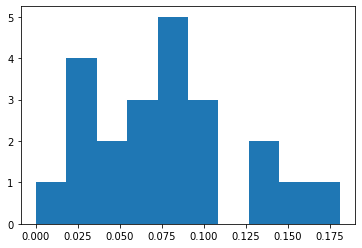

In [9]:
_,scores = zip(*sent_and_scores)

import matplotlib.pyplot as plt
plt.hist(scores)
plt.show()

In [10]:


SCORE_THRESH = 0.075
summary = filter(lambda sent_score: sent_score[1] >= SCORE_THRESH, sent_and_scores)
for sent, score in summary:
    print(sent.text.strip())



[Mansour Behabadi] wanted to harness the high power capability of USB-C using as simple a hardware design as possible.
After some research and experimental prototyping, he designed the fpx — an easy to use USB‑C power delivery board.
The fpx is an improved follow up to his earlier USB PD project fabpide2 which we featured some time back.
However, practical implementation of the USB PD protocol can be a bed of thorns.
Negotiating power delivery usually requires a dedicated PD controller coupled with a micro-controller for user control.
With USB PD, a USB-C port can be configured as either a source, a sink, or both and allows connected devices to negotiate up to 100 W (20 V, 5 A) of power.
The fpx is based around the popular STUSB4500 PD controller, which does most of the PD heavy lifting.
To program the STUSB4500, he used an ATtiny 816 micro-controller, whose UPDI programming and debugging interface consumes lower board real estate.
Using light isn’t a particularly new way of programmin

In [12]:
print(interesting_words)

['fpx', 'PD', 'usb', 'power', 'controller', 'source', 'programming', 'Mansour', 'use', 'board', 'project', 'negotiate', 'STUSB4500', 'ATtiny', 'capability']
